In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

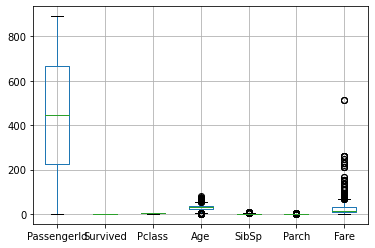

In [5]:
df.boxplot()

In [6]:
cols = ['Age', 'Fare','SibSp','Parch','Fare']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [27]:
cols = ['Age', 'Fare','SibSp','Parch','Fare']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:>

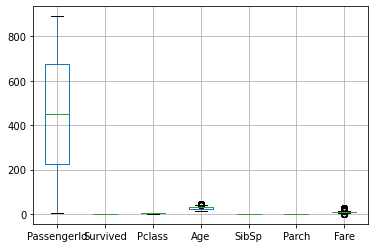

In [28]:
df.boxplot()

In [8]:
survived_count = df.groupby('Survived')['Survived'].count()
survived_count


Survived
0    404
1    173
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'Grouped by survival'}, xlabel='Survived', ylabel='count'>

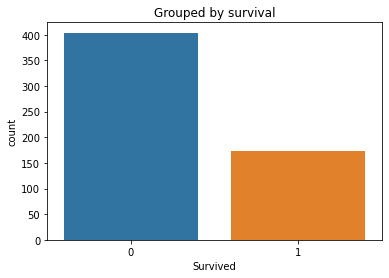

In [9]:
plt.title('Grouped by survival')
sns.countplot(x="Survived",data=df)

In [10]:
df["Pclass"].value_counts()

3    373
2    121
1     83
Name: Pclass, dtype: int64

<AxesSubplot:title={'center':'Grouped by pclass'}, xlabel='Pclass', ylabel='count'>

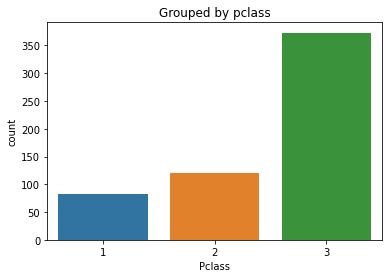

In [11]:
plt.title('Grouped by pclass')
sns.countplot(x="Pclass",data=df)


In [12]:
df["Sex"].value_counts()

male      434
female    143
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Grouped by gender'}, xlabel='Sex', ylabel='count'>

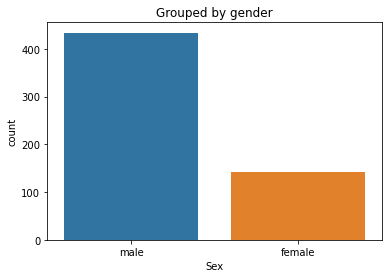

In [13]:
plt.title('Grouped by gender')
sns.countplot(x="Sex",data=df)

In [14]:
df["Embarked"].value_counts()

S    433
C     80
Q     64
Name: Embarked, dtype: int64

<AxesSubplot:title={'center':'Grouped by embarkation'}, xlabel='Embarked', ylabel='count'>

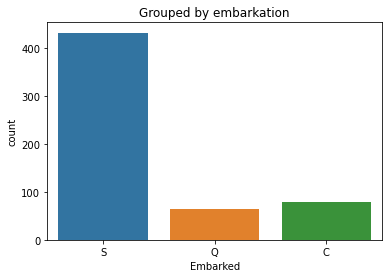

In [15]:
plt.title('Grouped by embarkation')
sns.countplot(x="Embarked",data=df)

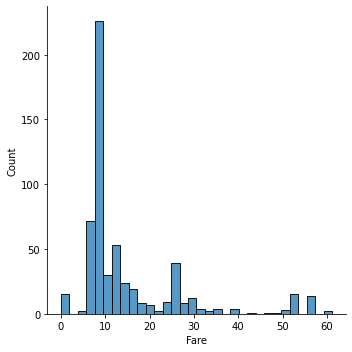

In [16]:
sns.displot(df["Fare"])

<AxesSubplot:title={'center':'Survived female and male'}, xlabel='Sex', ylabel='count'>

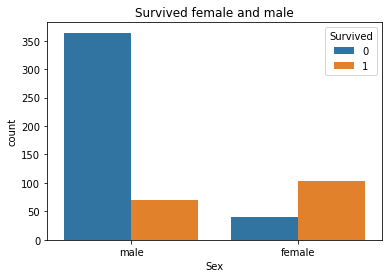

In [17]:
plt.title('Survived female and male')
sns.countplot(x="Sex",hue="Survived",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

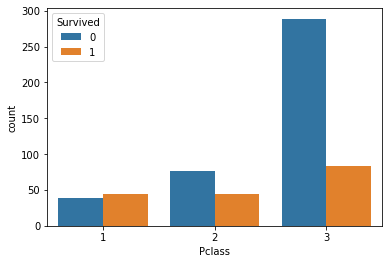

In [18]:
sns.countplot(x="Pclass",hue="Survived",data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

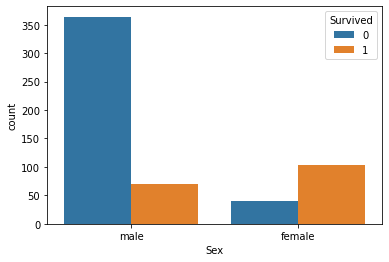

In [19]:
sns.countplot(x="Sex",hue="Survived",data=df)

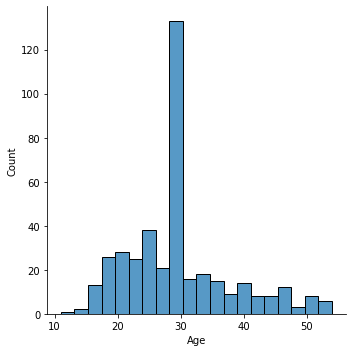

In [20]:
sns.displot(df[df["Survived"]==0]["Age"])

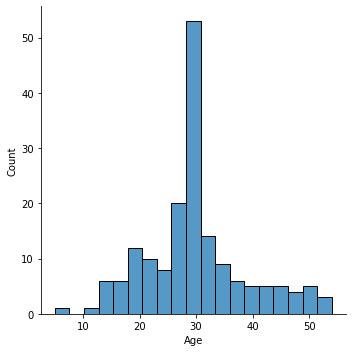

In [21]:
sns.displot(df[df["Survived"]==1]["Age"])

In [22]:
pd.crosstab(df["Pclass"],df["Survived"])

Survived,0,1
Pclass,,
1,39,44
2,76,45
3,289,84


In [23]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,40,103
male,364,70


In [24]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.050556,-0.054511,0.045852,-0.102197,NaN,0.019040
Survived,-0.050556,1.000000,-0.242189,0.006573,0.097999,NaN,0.268890
Pclass,-0.054511,-0.242189,1.000000,-0.354983,-0.078664,NaN,-0.670942
Age,0.045852,0.006573,-0.354983,1.000000,0.024616,NaN,0.261098
SibSp,-0.102197,0.097999,-0.078664,0.024616,1.000000,NaN,0.345588
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.019040,0.268890,-0.670942,0.261098,0.345588,NaN,1.000000


<AxesSubplot:>

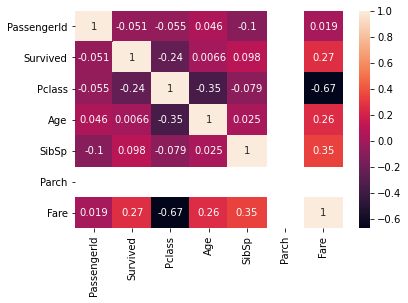

In [25]:
sns.heatmap(df.corr(),annot=True)